In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myanimelist-dataset/user-filtered.csv
/kaggle/input/myanimelist-dataset/users-score-2023.csv
/kaggle/input/myanimelist-dataset/anime-filtered.csv
/kaggle/input/myanimelist-dataset/anime-dataset-2023.csv
/kaggle/input/myanimelist-dataset/final_animedataset.csv
/kaggle/input/myanimelist-dataset/users-details-2023.csv


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('puntk')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
! unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading puntk: Package 'puntk' not found in index
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nlt

In [3]:
!pip install wordcloud -q

In [4]:
### Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import re
import string

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_columns',None)

In [5]:
# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

# Model Training
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#tensorflow - 
import tensorflow as tf
from tensorflow.keras.layers import Input,Embedding,GlobalMaxPooling1D, Dense,Dot
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#WordCloud
from wordcloud import WordCloud

#Python
from collections import defaultdict, Counter

## Import necessary modules for content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



In [6]:
#Stemming Library
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [7]:
#Reading the whole dataset
df_anime=pd.read_csv('/kaggle/input/myanimelist-dataset/anime-dataset-2023.csv')

In [8]:
df_anime.head(1)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...


In [9]:
df_anime.shape

(24905, 24)

In [9]:
# Load the dataset
df=pd.read_csv('/kaggle/input/myanimelist-dataset/users-score-2023.csv', usecols=["user_id","anime_id","rating"])

print("Shape of the Dataset:",df.shape)
df.head()

Shape of the Dataset: (24325191, 3)


,user_id,anime_id,rating
0,1,21,9
1,1,48,7
2,1,320,5
3,1,49,8
4,1,304,8


In [13]:
round(17272/df.shape[0]*100,1)

0.1

In [30]:
anime_ids = df[df['user_id'] == 1]['anime_id'].values

In [28]:
df_anime.head(1)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...


In [36]:
df_anime[df_anime['anime_id'].isin(anime_ids)]['Name'].values

array(['Cowboy Bebop', 'Cowboy Bebop: Tengoku no Tobira', 'Trigun',
       'Witch Hunter Robin', 'Bouken Ou Beet', 'Eyeshield 21',
       'Hachimitsu to Clover', 'Hungry Heart: Wild Striker',
       'Initial D Fourth Stage', 'Monster', 'Naruto', 'One Piece',
       'Tennis no Ouji-sama', 'School Rumble', 'Sunabouzu',
       'Neon Genesis Evangelion',
       'Neon Genesis Evangelion: Death & Rebirth',
       'Neon Genesis Evangelion: The End of Evangelion',
       'Kenpuu Denki Berserk', 'Koukaku Kidoutai',
       'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen',
       'Rurouni Kenshin: Meiji Kenkaku Romantan',
       'Rurouni Kenshin: Meiji Kenkaku Romantan - Ishinshishi e no Chinkonka',
       'Akira', '.hack//Sign', 'Aa! Megami-sama!', 'Tenshi Kinryouku',
       'Kidou Tenshi Angelic Layer', 'Ai Yori Aoshi', 'Appleseed (Movie)',
       'Arc the Lad', 'Avenger', 'Beck', 'Blue Gender', 'Chobits',
       'Chrno Crusade', 'D.N.Angel', 'D.C.: Da Capo', 'DearS',
       'Azumanga Da

In [7]:
df.duplicated().sum(),df.isna().sum()

(0,
 user_id     0
 anime_id    0
 rating      0
 dtype: int64)

In [8]:
# Calculating the average score given by views
avg_score = np.mean(df['rating'])
print('Average Score:', avg_score)

Average Score: 7.622930072779285


In [9]:
df[['rating']]

,rating
0,9
1,7
2,5
3,8
4,8
...,...
24325186,3
24325187,6
24325188,9
24325189,10


In [10]:
#Data Preprocessing

#Bring rating feature from 1-10 to 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
df['rating_scaled'] = scaler.fit_transform(df[['rating']])
df.head()

,user_id,anime_id,rating,rating_scaled
0,1,21,9,0.888889
1,1,48,7,0.666667
2,1,320,5,0.444444
3,1,49,8,0.777778
4,1,304,8,0.777778


In [11]:
#Encoding user_id
user_encoder = LabelEncoder()
df['user_encoded'] = user_encoder.fit_transform(df['user_id'])
num_users = len(user_encoder.classes_)
print(num_users,len(df['user_encoded']),len(df['user_encoded'].unique()) )

270033 24325191 270033


In [12]:
#Encoding anime_id
anime_encoder = LabelEncoder()
df['anime_encoded'] = anime_encoder.fit_transform(df['anime_id'])
num_animes = len(anime_encoder.classes_)
print(num_animes,len(df['anime_encoded']),len(df['anime_encoded'].unique()) )

16500 24325191 16500


In [13]:
pickle.dump(user_encoder,open('user_encoder.pkl','wb'))
pickle.dump(anime_encoder,open('anime_encoder.pkl','wb'))

In [14]:
#Model 1: Item based filtering

In [15]:
df[['user_encoded','anime_encoded']].values #columns as array

array([[     0,     11],
       [     0,     29],
       [     0,    296],
       ...,
       [270032,   1393],
       [270032,    202],
       [270032,   5327]])

In [16]:
df['rating_scaled'].values

array([0.88888889, 0.66666667, 0.44444444, ..., 0.88888889, 1.        ,
       1.        ])

In [17]:
#Shuffling the dataframe
df = shuffle(df,random_state=42)
X = df[['user_encoded','anime_encoded']].values
y = df['rating_scaled'].values

X.shape, y.shape

((24325191, 2), (24325191,))

In [18]:
len(y)*0.2

4865038.2

In [19]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

print("Number of samples in the training set:", len(y_train))
print("Number of samples in the test set:", len(y_test))

Number of samples in the training set: 24315191
Number of samples in the test set: 10000


In [20]:
X_train_array = [X_train[:,0], X_train[:,1]]
X_test_array = [X_test[:,0], X_test[:,1]]


In [21]:
X_train_array, X_test_array, y_train, y_test

([array([ 77719, 265299, 261438, ..., 155977, 179928, 261998]),
  array([6023, 6218, 6718, ...,  299, 4701, 6838])],
 [array([ 59252,  55997, 101769, ...,  57715,  84018, 199724]),
  array([7197, 2048, 4541, ..., 8580, 1180, 3392])],
 array([0.66666667, 0.66666667, 0.66666667, ..., 0.44444444, 1.        ,
        0.88888889]),
 array([0.55555556, 0.66666667, 0.88888889, ..., 1.        , 0.22222222,
        0.55555556]))

In [22]:
def RecSys(num_users,num_animes,embedding_size=128):
    
    #User input and User Embedding
    user = Input(name='user_encoded',shape=[1]) #(None,1)
    user_embedding = Embedding(name='user_embedding',input_dim=num_users,output_dim=embedding_size)(user) #(None,1,128)
    
    #Anime input and Anime Embedding
    anime = Input(name='anime_encoded',shape=[1]) #(None,1)
    anime_embedding = Embedding(name='anime_embedding',input_dim=num_animes,output_dim=embedding_size)(anime) #(None,1,128)
    
    # Dot product of user and anime embeddings
    dot = Dot(name='user_dot_anime',normalize=True,axes=2)([user_embedding,anime_embedding]) #(None,1,1)
    
    #GlobalMaxPool to Flatten
    flattened = GlobalMaxPooling1D()(dot) #(None,1)
    
    #Dense layers for prediction
    x = Dense(64,activation='relu')(flattened)
    x = Dense(8,activation='relu')(x)
    output = Dense(1,activation='sigmoid')(x)
    
    #Create and compile model
    model = Model(inputs=[user,anime],outputs=output)
    model.compile(loss='mae', optimizer=Adam(learning_rate=0.001), metrics=["mse"]) #loss='binary_crossentropy'
    return model
    

model1 = RecSys(num_users,num_animes)

In [23]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_encoded (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 anime_encoded (InputLayer)  [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 128)               3456422   ['user_encoded[0][0]']        
                                                          4                                       
                                                                                                  
 anime_embedding (Embedding  (None, 1, 128)               2112000   ['anime_encoded[0][0]']   

In [24]:
## Import necessary callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Define the initial learning rate, minimum learning rate, maximum learning rate, and batch size
start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

# Learning rate schedule function
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

# # Learning rate scheduler callback
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

# File path for saving the model weights
checkpoint_filepath = '/kaggle/working/myanimeweights.h5'

# Model checkpoint callback to save the best weights
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(patience=5, monitor='val_loss', mode='min', restore_best_weights=True)

# Define the list of callbacks
my_callbacks = [model_checkpoints,lr_callback,early_stopping]

In [25]:
# Model training
history = model1.fit( x=X_train_array,y=y_train,batch_size=batch_size,epochs=20,verbose=1,
                        validation_data=(X_test_array, y_test),callbacks=my_callbacks
                    )

model1.load_weights(checkpoint_filepath)

Epoch 1/20
2432/2432 [==============================] - 94s 37ms/step - loss: 0.2593 - mse: 0.0873 - val_loss: 0.2542 - val_mse: 0.0846 - lr: 1.0000e-05
Epoch 2/20
2432/2432 [==============================] - 28s 11ms/step - loss: 0.2395 - mse: 0.0767 - val_loss: 0.2210 - val_mse: 0.0677 - lr: 1.8000e-05
Epoch 3/20
2432/2432 [==============================] - 25s 10ms/step - loss: 0.1956 - mse: 0.0544 - val_loss: 0.1644 - val_mse: 0.0414 - lr: 2.6000e-05
Epoch 4/20
2432/2432 [==============================] - 25s 10ms/step - loss: 0.1520 - mse: 0.0364 - val_loss: 0.1470 - val_mse: 0.0343 - lr: 3.4000e-05
Epoch 5/20
2432/2432 [==============================] - 24s 10ms/step - loss: 0.1418 - mse: 0.0351 - val_loss: 0.1420 - val_mse: 0.0357 - lr: 4.2000e-05
Epoch 6/20
2432/2432 [==============================] - 23s 10ms/step - loss: 0.1318 - mse: 0.0302 - val_loss: 0.1235 - val_mse: 0.0265 - lr: 5.0000e-05
Epoch 7/20
2432/2432 [==============================] - 24s 10ms/step - loss: 0.11

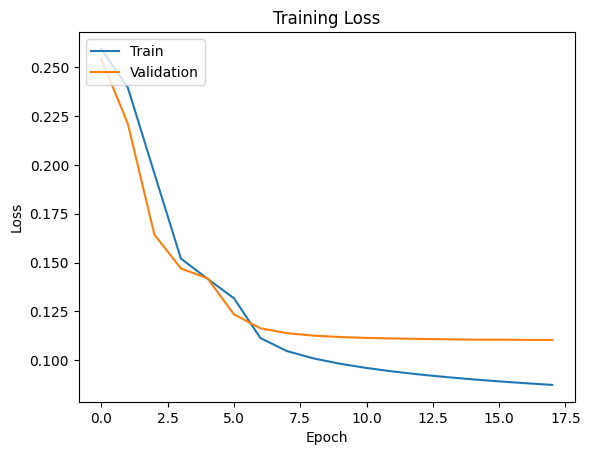

In [26]:
# Training results visualization
plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [27]:
#Getting Recommendations

In [28]:
def extract_weights(name):
    
    #get the name of the layer
    weight_layer = model1.get_layer(name)
    weights = weight_layer.get_weights()[0]
    
    # Normalize the weights
    weights = weights / np.linalg.norm(weights, axis=1).reshape((-1, 1))
    return weights

user_weights = extract_weights('user_embedding') #embedding_weights
anime_weights = extract_weights('anime_embedding') #embedding_weights

In [29]:
import pickle

pickle.dump(user_weights,open('user_weights.pkl','wb'))
pickle.dump(anime_weights,open('anime_weights.pkl','wb'))

In [30]:
user_weights.shape #128

(270033, 128)

"""Now I want my model to recommend only those animes that have 
been rated by at least a certain number of users, which I will set as the threshold. 
This threshold helps ensure that the recommended anime titles have received a sufficient 
number of ratings, indicating a certain level of popularity or user engagement."""

In [10]:
df_anime.sample(1)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
20538,47926,Tudou Dori: Yi Meng Yilu,UNKNOWN,土豆多励之一梦一路,UNKNOWN,Adventure,No description available for this anime.,ONA,26.0,Not available,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,10 min per ep,PG - Children,13136.0,24597,0,UNKNOWN,34,https://cdn.myanimelist.net/images/anime/1024/...


In [11]:
anime_weights[10].shape #name=naruto

NameError: name 'anime_weights' is not defined

In [ ]:
anime_weights.shape

In [35]:
np.dot(anime_weights,anime_weights[10]).shape

(16500,)

In [62]:
#Content Based Recommendation
def find_similar_animes(name,n=10): #Name	English name	Other name
    SimilarityArr = []
    name = name.lower()
    try:
        anime_name =  df_anime[df_anime['Name'].str.lower() == name].iloc[0]
        anime_name_index = anime_name['anime_id']
        encoded_index =  anime_encoder.transform([anime_name_index])[0] #avoid fit_transform as it will train anime_encoder
        anime_name_weight = anime_weights[encoded_index] #multiple naruto embedding with other embedding causing increase in weights
        distances = np.dot(anime_weights,anime_name_weight )
        sorted_distances = (distances).argsort()[::-1]#np.argsort(distances)
        top10_sorted_distances = sorted_distances[:11] 

        for anime_index in top10_sorted_distances:
            decoded_anime = anime_encoder.inverse_transform([anime_index])[0]
            anime_frame = df_anime[df_anime['anime_id'] == decoded_anime]
            anime_name = anime_frame['Name'].values[0]
            english_name = anime_frame['English name'].values[0]
            name = english_name if english_name != "UNKNOWN" else anime_name
            genre = anime_frame['Genres'].values[0]
            Synopsis = anime_frame['Synopsis'].values[0]
            url = str(anime_frame['Image URL'].values[0])

            similarity = distances[anime_index]
            similarity = "{:.2f}%".format(similarity * 100)
            SimilarityArr.append({"Name": name, "Similarity": similarity,'Url':url, "Genres": genre, "Synopsis":Synopsis})
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="Similarity", ascending=False)
        return Frame.head(10)
    except:
        print(f"{name} not found!. Please Try Again")
        
find_similar_animes('One piece')

,Name,Similarity,Url,Genres,Synopsis
1,Death Note,84.00%,https://cdn.myanimelist.net/images/anime/9/945...,"Supernatural, Suspense","Brutal murders, petty thefts, and senseless vi..."
2,Code Geass: Lelouch of the Rebellion R2,83.34%,https://cdn.myanimelist.net/images/anime/1088/...,"Action, Award Winning, Drama, Sci-Fi","One year has passed since the Black Rebellion,..."
3,Code Geass: Lelouch of the Rebellion,82.33%,https://cdn.myanimelist.net/images/anime/1032/...,"Action, Award Winning, Drama, Sci-Fi","In the year 2010, the Holy Empire of Britannia..."
4,Fighting Spirit,82.02%,https://cdn.myanimelist.net/images/anime/4/863...,Sports,"In his father's absence, teenager Ippo Makunou..."
5,Fighting Spirit: New Challenger,81.80%,https://cdn.myanimelist.net/images/anime/8/566...,Sports,Japanese Featherweight Champion Ippo Makunouch...
6,Fullmetal Alchemist: Brotherhood,81.51%,https://cdn.myanimelist.net/images/anime/1208/...,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...
7,Hunter x Hunter,81.48%,https://cdn.myanimelist.net/images/anime/1337/...,"Action, Adventure, Fantasy",Hunters devote themselves to accomplishing haz...
8,One Piece Film: Strong World,81.27%,https://cdn.myanimelist.net/images/anime/1192/...,"Action, Adventure, Fantasy",Upon hearing news that islands in East Blue ar...
9,Attack on Titan,80.50%,https://cdn.myanimelist.net/images/anime/10/47...,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near..."
10,Great Teacher Onizuka,79.57%,https://cdn.myanimelist.net/images/anime/13/11...,Comedy,Twenty-two-year-old Eikichi Onizuka—ex-biker g...


In [37]:
df.to_csv('user_anime_scores.csv')

In [4]:
df_anime

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


In [12]:
#Content Based RecSys using Cosine Similarity
anime = df_anime[['anime_id','Name','Score','Genres','Synopsis','Licensors','Studios','Image URL']]

In [13]:
#Merging String/Array Features
anime['combo'] = anime['Genres']+' '+anime['Synopsis']+' '+anime['Licensors']+' '+anime['Studios']

In [14]:
anime = anime[['anime_id','Name','combo','Score','Image URL']]

In [15]:
anime['combo'] =  anime['combo'].apply(lambda x:x.lower())

In [16]:
anime

,anime_id,Name,combo,Score,Image URL
0,1,Cowboy Bebop,"action, award winning, sci-fi crime is timeles...",8.75,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,"action, sci-fi another day, another bounty—suc...",8.38,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,"action, adventure, sci-fi vash the stampede is...",8.22,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,"action, drama, mystery, supernatural robin sen...",7.25,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,"adventure, fantasy, supernatural it is the dar...",6.94,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...
24900,55731,Wu Nao Monu,"comedy, fantasy, slice of life no description ...",UNKNOWN,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,"action, adventure, fantasy no description avai...",UNKNOWN,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,"action, adventure, fantasy, sci-fi no descript...",UNKNOWN,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,unknown a music video for the song bokura no s...,UNKNOWN,https://cdn.myanimelist.net/images/anime/1931/...


In [17]:
def stem(text):
    y = []
    for word in text.split():
        changed_word = ps.stem(word)
        y.append(changed_word)
    return " ".join(y)


anime['combo'] = anime['combo'].apply(stem)

In [150]:
import pickle

pickle.dump(anime,open('anime.pkl','wb'))

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [6]:
vectors = cv.fit_transform(anime['combo']).toarray() #sparse matrix to np

NameError: name 'anime' is not defined

In [20]:
vectors[0].shape

(5000,)

In [21]:
cv.get_feature_names_out()

array(['000', '01', '10', ..., 'zoo', 'zorori', 'zutomayo'], dtype=object)

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
similarity = cosine_similarity(vectors)

NameError: name 'vectors' is not defined

In [1]:
similarity[0]

NameError: name 'similarity' is not defined

In [168]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [164]:
def recommendation(name):
    anime_index =  anime[anime['Name'].str.lower() == name.lower()].index[0]
    distances = similarity[anime_index]
    rec_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x: x[1])[1:25]
    
    for i in rec_list:
        anime_frame = anime.iloc[i[0]]['Name'] #df_anime[df_anime['anime_id'] == decoded_anime]
        print(anime_frame)

    
recommendation('One Piece')

One Piece: Episode of East Blue - Luffy to 4-nin no Nakama no Daibouken
Kaizoku Ouji
One Piece Film: Strong World
One Piece: Oounabara ni Hirake! Dekkai Dekkai Chichi no Yume!
Nitian Xie Shen
Okashi na Tensei
One Piece: Mamore! Saigo no Dai Butai
Space Cobra
Ganbare Genki
Zoku Koihime
Magi: Sinbad no Bouken (TV)
Magi: The Labyrinth of Magic
Noumin Kanren no Skill bakka Agetetara Nazeka Tsuyoku Natta.
Black Lagoon
One Piece Film: Z
Vinland Saga Season 2
Cike Wu Liuqi
Kami no Tou
Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e Kayou
Hortensia Saga
Captain Future
Hazedon
Kushimitama Samurai
D_Cide Traumerei the Animation


In [64]:
#User Based Recommendation
#(The user-based recommendation system is divided into three parts:)

Part 1: Finding Similar Users In this part, we randomly select a user from the dataset and find similar users based on their anime preferences. The find_similar_users function calculates the similarity between users using a weighted matrix and returns a dataframe of similar users. The function takes an input user, number of similar users to find (n), and other optional parameters. The result is a list of similar users to the input user.

In [92]:
np.dot(user_weights,user_weights[250127])

array([-0.01260761,  0.00570494,  0.07427694, ...,  0.10802759,
       -0.01068388,  0.11345263], dtype=float32)

In [37]:
df.groupby(['user_id']).count()

,anime_id,rating
user_id,,
1,262,262
4,284,284
9,65,65
20,105,105
23,282,282
...,...,...
1291057,240,240
1291079,94,94
1291085,59,59


In [21]:
ratings_per_user = df.groupby(['user_id']).size()
#pickle.dump(ratings_per_user,open('ratings_per_user.pkl','wb'))
ratings_per_user

user_id
1          262
4          284
9           65
20         105
23         282
          ... 
1291057    240
1291079     94
1291085     59
1291087    210
1291097      3
Length: 270033, dtype: int64

In [22]:
ratings_per_user.index

Index([      1,       4,       9,      20,      23,      37,      47,      48,
            53,      66,
       ...
       1291033, 1291039, 1291043, 1291049, 1291055, 1291057, 1291079, 1291085,
       1291087, 1291097],
      dtype='int64', name='user_id', length=270033)

In [70]:
def  find_similar_users(user_id,n=10):
    try:
        SimilarityArr = []
        index = user_id
        encoded_index = user_encoder.transform([index])[0]

        #using embedding user weights
        weights = user_weights
        distances = np.dot(weights,weights[encoded_index]) #270033
        sorted_distances = (distances).argsort()[::-1]#np.argsort(distances)
        top10_sorted_distances = sorted_distances[1:12] 

        for i in top10_sorted_distances:
            similarity = distances[i]
            decoded_index = user_encoder.inverse_transform([i])[0]
            SimilarityArr.append({"similar_users": decoded_index, "similarity": similarity})
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame
    
    except:
        print(f'{user_id} Not present, Try Another')
        

#Selecting Random User
ratings_per_user = df.groupby(['user_id']).size() #counting the user_id 
random_user_id = int(ratings_per_user[ratings_per_user > 500].sample(1,random_state=None).index[0])
similar_users = find_similar_users(random_user_id)
#similar_users = similar_users[similar_users['similarity'] > 0.5 && similar_users['similar_users'] != random_user_id]
similar_users

,similar_users,similarity
0,93292,0.449221
1,1084977,0.407648
2,1097983,0.403287
3,412274,0.398978
4,1195739,0.397784
5,353919,0.396417
6,57274,0.394611
7,1068759,0.392486
8,78798,0.389763
9,541367,0.388835


Part 2: User Preferences This part focuses on understanding the preferences of the selected user. The get_user_preferences function takes a user ID as input and retrieves the anime preferences of that user. It considers the top-rated animes by the user and analyzes the genres they prefer. The function also provides an option to plot a word cloud to visualize the preferred genres. The output is a dataframe containing the anime titles and their associated genres.

In [71]:
# Function to display a word cloud of preferred genres
def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
    plt.figure(figsize=(10, 8))
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [72]:
# Get user preferences for the random user
def get_user_preferences(user_id,plot=False,verbose=1):
    animes_watched_by_user = df[df['user_id'] == user_id]
    user_rating_percentile = np.percentile(animes_watched_by_user['rating'], 95)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_by_user = (animes_watched_by_user.sort_values(by="rating", ascending=False).anime_id.values)
    anime_df_rows = df_anime[df_anime["anime_id"].isin(top_animes_by_user)]
    anime_df_rows = anime_df_rows[["Name", "Genres"]]
    
    
    mean_rating = animes_watched_by_user['rating'].mean()
    print(f"User {user_id} has watched anime(s) {len(animes_watched_by_user)} with an average rating of {round(mean_rating,2)}")
    print('\033[1m----- Preferred genres----- \033[0m\n')

    if plot:
        genres_list = []
        for genres in anime_df_rows['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre.strip())

        showWordCloud(dict(Counter(genres_list)))
    
    return anime_df_rows
    
    
    

user_pref = get_user_preferences(random_user_id, plot=True)
pd.DataFrame(user_pref).head(5)

User 938109 has watched anime(s) 64 with an average rating of 9.5
----- Preferred genres----- 



,Name,Genres
833,Gintama,"Action, Comedy, Sci-Fi"
1431,Code Geass: Hangyaku no Lelouch,"Action, Award Winning, Drama, Sci-Fi"
1537,Kaze no Stigma,"Action, Romance, Supernatural"
1845,Darker than Black: Kuro no Keiyakusha,"Action, Mystery, Sci-Fi"
2647,Code Geass: Hangyaku no Lelouch R2,"Action, Award Winning, Drama, Sci-Fi"



Part 3: Recommending Animes for a User In the final part, we recommend animes to the selected user based on the preferences of similar users. The get_recommended_animes function iterates through the list of similar users, retrieves their preferences, and identifies animes that are not present in the preferences of the selected user. It then generates a list of recommended animes along with their genres and a brief synopsis. The output is a dataframe containing the recommended animes for the user.

In [73]:
def get_recommended_animes(similar_users,user_pref,n=10):
    recommended_animes = []
    anime_list = []
    
    for user in similar_users.similar_users.values:
        preferred_animes = get_user_preferences(int(user))
        pref_list = preferred_animes[~preferred_animes["Name"].isin(user_pref["Name"].values)]
        anime_list.append(pref_list.Name.values)
    
    if len(anime_list) == 0:
        print("No anime recommendations available for the given users.")
        return pd.DataFrame()
    
    
    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    # Count the occurrences of each anime in the entire dataset
    anime_count = df['anime_id'].value_counts()
    
    for i, anime_name in enumerate(sorted_list.index):
        if isinstance(anime_name, str):
            try:
                anime_id = df_anime[df_anime.Name == anime_name].anime_id.values[0]
                english_name = df_anime[df_anime['Name'] == anime_name]['English name'].values[0]
                name = english_name if english_name != "UNKNOWN" else anime_name
                genre = df_anime[df_anime.Name == anime_name].Genres.values[0]
                Synopsis = df_anime[df_anime.Name == anime_name].Synopsis.values[0]
                n_user_pref = anime_count.get(anime_id, 0)  # Get the total count of users who have watched this anime
                recommended_animes.append({
                    "n": n_user_pref,
                    "anime_name": anime_name, 
                    "Genres": genre, 
                    "Synopsis": Synopsis
                })
            except:
                pass
    return pd.DataFrame(recommended_animes)

    
        
        
    


recommended_animes = get_recommended_animes(similar_users,user_pref) #output of 1st and 2nd fns
recommended_animes

User 93292 has watched anime(s) 234 with an average rating of 8.46
----- Preferred genres----- 

User 1084977 has watched anime(s) 99 with an average rating of 8.3
----- Preferred genres----- 

User 1097983 has watched anime(s) 164 with an average rating of 8.16
----- Preferred genres----- 

User 412274 has watched anime(s) 70 with an average rating of 8.27
----- Preferred genres----- 

User 1195739 has watched anime(s) 48 with an average rating of 9.15
----- Preferred genres----- 

User 353919 has watched anime(s) 12 with an average rating of 8.33
----- Preferred genres----- 

User 57274 has watched anime(s) 49 with an average rating of 9.22
----- Preferred genres----- 

User 1068759 has watched anime(s) 47 with an average rating of 9.13
----- Preferred genres----- 

User 78798 has watched anime(s) 59 with an average rating of 7.71
----- Preferred genres----- 

User 541367 has watched anime(s) 29 with an average rating of 9.03
----- Preferred genres----- 

User 352062 has watched anim

,n,anime_name,Genres,Synopsis
0,57516,Tengen Toppa Gurren Lagann,"Action, Adventure, Award Winning, Sci-Fi",Simon and Kamina were born and raised in a dee...
1,43605,Baccano!,"Action, Comedy, Mystery, Supernatural","During the early 1930s in Chicago, the transco..."
2,51651,Clannad: After Story,"Drama, Romance, Supernatural","Clannad: After Story, the sequel to the critic..."
3,60866,Durarara!!,"Action, Mystery, Supernatural","In Tokyo's downtown district of Ikebukuro, ami..."
4,8155,Mob Psycho 100 II,"Action, Comedy, Supernatural","Shigeo ""Mob"" Kageyama is now maturing and unde..."
5,37004,Fate/Zero,"Action, Fantasy, Supernatural","With the promise of granting any wish, the omn..."
6,45309,Mahou Shoujo Madoka★Magica,"Award Winning, Drama, Suspense",Madoka Kaname and Sayaka Miki are regular midd...
7,38439,Toki wo Kakeru Shoujo,"Award Winning, Drama, Romance, Sci-Fi",Makoto Konno is in her last year of high schoo...
8,60311,Howl no Ugoku Shiro,"Adventure, Award Winning, Drama, Fantasy, Romance","That jumbled piece of architecture, that cacop..."
9,45719,Shingeki no Kyojin,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near..."


In [11]:
57516/df.shape[0]

0.002364462420870611

In [64]:
##Model training (content-based filtering)

# Create a TF-IDF vectorizer - Genres
tfidf = TfidfVectorizer(stop_words='english')

# Define a generator to compute TF-IDF matrix on the fly
tfidf_matrix_generator = tfidf.fit_transform((genre for genre in df_anime['Genres'].values.astype('U'))) #u-unicode

# Compute cosine similarity matrix as a sparse matrix
cosine_sim_sparse = linear_kernel(tfidf_matrix_generator, tfidf_matrix_generator)

In [65]:
# Function to get recommendations based on cosine similarity, genre, and ratings based on score
def get_recommendations(title, cosine_sim, df):
    idx = df_anime[df_anime['Name'] == title].index[0]

    # Compute the similarity scores between the anime at the given index and all other animes
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filter out animes with unknown scores
    valid_scores = [x for x in sim_scores if df_anime.iloc[x[0]]['Score'] != "UNKNOWN"]

    # Sort the valid anime similarity scores based on the cosine similarity and ratings score in descending order
    sorted_scores = sorted(valid_scores, key=lambda x: (x[1], df_anime.iloc[x[0]]['Score']), reverse=True)

    # Get the top 10 similar animes (excluding the anime itself)
    top_animes = [x for x in sorted_scores if x[0] != idx][:5]

    # Extract the indices of the recommended animes
    recommended_indices = [idx for idx, _ in top_animes]
    recommended_animes = df_anime.iloc[recommended_indices][['Name', 'Genres','Synopsis', 'Score','Image URL']]
    return recommended_animes


anime_title = 'Bleach'
recommendations = get_recommendations(anime_title, cosine_sim_sparse, df_anime)
print(f'Recommendations for "{anime_title}":')
recommendations

Recommendations for "Bleach":


,Name,Genres,Score
16617,Bleach: Sennen Kessen-hen,"Action, Adventure, Fantasy",9.07
6456,Hunter x Hunter (2011),"Action, Adventure, Fantasy",9.04
11,One Piece,"Action, Adventure, Fantasy",8.69
115,Hunter x Hunter,"Action, Adventure, Fantasy",8.41
116,Hunter x Hunter: Original Video Animation,"Action, Adventure, Fantasy",8.31


In [9]:
#User-Custom Based Recommendation

In [9]:
df_anime.head(1)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...


In [10]:
df_anime['Synopsis'][0]

"Crime is timeless. By the year 2071, humanity has expanded across the galaxy, filling the surface of other planets with settlements like those on Earth. These new societies are plagued by murder, drug use, and theft, and intergalactic outlaws are hunted by a growing number of tough bounty hunters.\n\nSpike Spiegel and Jet Black pursue criminals throughout space to make a humble living. Beneath his goofy and aloof demeanor, Spike is haunted by the weight of his violent past. Meanwhile, Jet manages his own troubled memories while taking care of Spike and the Bebop, their ship. The duo is joined by the beautiful con artist Faye Valentine, odd child Edward Wong Hau Pepelu Tivrusky IV, and Ein, a bioengineered Welsh Corgi.\n\nWhile developing bonds and working to catch a colorful cast of criminals, the Bebop crew's lives are disrupted by a menace from Spike's past. As a rival's maniacal plot continues to unravel, Spike must choose between life with his newfound family or revenge for his ol

In [11]:
df_anime['Score'].isna().sum()

0

In [12]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('conditioned'), ps.stem('conditioning'), ps.stem('conditioned.')

('condit', 'condit', 'conditioned.')

In [13]:
import string
import tensorflow as tf
import re
string.punctuation

def standardization(data):
    '''
    Input: raw reviews
    output: standardized reviews
    '''
    x = tf.strings.lower(data) #all strings to lower
    x=tf.strings.regex_replace(x,"<[^>]+>","") # removing html
    x=tf.strings.regex_replace(x,"[%s]"%re.escape('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')," ")#removing punctuation
    x = x.numpy()
    x = x.decode('utf-8')
    return x
    
feature = 'Anime should have comedy, drame, sci-fi'
standardization(feature)

'anime should have comedy  drame  sci fi'

In [14]:
df_anime_na = df_anime[df_anime['Name'] == 'Naruto']
df_anime_na

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
10,20,Naruto,Naruto,ナルト,7.99,"Action, Adventure, Fantasy","Moments prior to Naruto Uzumaki's birth, a hug...",TV,220.0,"Oct 3, 2002 to Feb 8, 2007",fall 2002,Finished Airing,"TV Tokyo, Aniplex, Shueisha",VIZ Media,Pierrot,Manga,23 min per ep,PG-13 - Teens 13 or older,599.0,8,76343,1883772.0,2717330,https://cdn.myanimelist.net/images/anime/13/17...


In [18]:
def requirementbased(genre,scores,features):
    #Lower casing every string value
    features = standardization(features)
    eng_sw = stopwords.words('english')
    features_token=word_tokenize(features) 
    features_token_set = set([ps.stem(token) for token in features_token if token not in eng_sw ])
    

    #reqbased= df_anime_bebop[df_anime_bebop['Genres'].isin(genre)]
    df_anime['Score']= df_anime['Score'].replace('UNKNOWN',6.25).astype('float32')
    reqbased= df_anime[df_anime['Score']>=scores].sort_values(by='Score',ascending=False)
    reqbased = reqbased.reset_index(drop=True)
    
    common_count = []
    for i in range(reqbased.shape[0]):
        summary = standardization(reqbased['Synopsis'][i])
        summary_features_token  = word_tokenize(summary)
        combo_summary_token_set = set([ps.stem(token) for token in summary_features_token if token not in eng_sw ])
        common_count.append(len(features_token_set.intersection(combo_summary_token_set)))
        
    reqbased['similarity'] = common_count
    
        
    reqbased=reqbased.sort_values(by='similarity',ascending=False).head(10)
    return reqbased
    
text = "Moments prior to Naruto Uzumaki's birth, a huge fox"
requirementbased(['Action'],6.0,text)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,similarity
11584,55453,Naruto (2023),Naruto,ナルト,6.25,"Action, Adventure, Comedy, Fantasy","Moments prior to Naruto Uzumaki's birth, a hug...",TV,UNKNOWN,Sep 2023 to ?,UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,UNKNOWN,Manga,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1587/...,7
609,20,Naruto,Naruto,ナルト,7.99,"Action, Adventure, Fantasy","Moments prior to Naruto Uzumaki's birth, a hug...",TV,220.0,"Oct 3, 2002 to Feb 8, 2007",fall 2002,Finished Airing,"TV Tokyo, Aniplex, Shueisha",VIZ Media,Pierrot,Manga,23 min per ep,PG-13 - Teens 13 or older,599.0,8,76343,1883772.0,2717330,https://cdn.myanimelist.net/images/anime/13/17...,7
1217,13667,Naruto: Shippuuden Movie 6 - Road to Ninja,Naruto Shippuden the Movie 6: Road to Ninja,ROAD TO NINJA NARUTO THE MOVIE,7.68,"Action, Adventure, Fantasy","Returning home to Konohagakure, the young ninj...",Movie,1.0,"Jul 28, 2012",UNKNOWN,Finished Airing,"TV Tokyo, Aniplex, Dentsu, Toho, Shueisha",VIZ Media,Pierrot,Manga,1 hr 49 min,PG-13 - Teens 13 or older,1190.0,659,573,199906.0,331660,https://cdn.myanimelist.net/images/anime/1620/...,3
962,16870,The Last: Naruto the Movie,Naruto Shippuden the Movie 7: The Last,THE LAST NARUTO THE MOVIE,7.79,"Action, Adventure, Fantasy, Romance",Two years have passed since the end of the Fou...,Movie,1.0,"Dec 6, 2014",UNKNOWN,Finished Airing,"TV Tokyo, Shueisha",VIZ Media,Pierrot,Manga,1 hr 52 min,PG-13 - Teens 13 or older,932.0,348,2109,384937.0,576646,https://cdn.myanimelist.net/images/anime/1491/...,2
283,1735,Naruto: Shippuuden,Naruto Shippuden,-ナルト- 疾風伝,8.26,"Action, Adventure, Fantasy",It has been two and a half years since Naruto ...,TV,500.0,"Feb 15, 2007 to Mar 23, 2017",winter 2007,Finished Airing,"TV Tokyo, Aniplex, KSS, Rakuonsha, TV Tokyo Mu...",VIZ Media,Pierrot,Manga,23 min per ep,PG-13 - Teens 13 or older,278.0,15,107735,1569553.0,2349413,https://cdn.myanimelist.net/images/anime/1565/...,2
2499,6325,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,Naruto Shippuden the Movie 3: The Will of Fire,ナルト- 疾風伝 火の意志を継ぐ者,7.33,"Action, Adventure, Fantasy",After being sent to investigate the alarming d...,Movie,1.0,"Aug 1, 2009",UNKNOWN,Finished Airing,Toho,VIZ Media,Pierrot,Manga,1 hr 35 min,PG-13 - Teens 13 or older,2366.0,1121,121,113068.0,199162,https://cdn.myanimelist.net/images/anime/1493/...,2
2164,28755,Boruto: Naruto the Movie,Boruto: Naruto the Movie,BORUTO -NARUTO THE MOVIE-,7.40,"Action, Adventure, Fantasy","The spirited Boruto Uzumaki, son of Seventh Ho...",Movie,1.0,"Aug 7, 2015",UNKNOWN,Finished Airing,"Toho, Shueisha",VIZ Media,Pierrot,Manga,1 hr 35 min,PG-13 - Teens 13 or older,2077.0,463,923,289130.0,447423,https://cdn.myanimelist.net/images/anime/4/782...,2
2988,5395,Nekketsu Saikyou Go-Saurer,UNKNOWN,熱血最強ゴウザウラー,7.23,"Action, Sci-Fi",The Kikaika (literally mechanization) Empire i...,TV,51.0,"Mar 3, 1993 to Feb 23, 1994",spring 1993,Finished Airing,Yomiuri Advertising,UNKNOWN,Sunrise,Original,23 min per ep,PG-13 - Teens 13 or older,2898.0,11425,8,384.0,1507,https://cdn.myanimelist.net/images/anime/1138/...,2
3746,3754,Tongari Boushi no Memole,UNKNOWN,とんがり帽子のメモル,7.10,Fantasy,Memoru is one of 245 people who came to earth ...,TV,50.0,"Mar 3, 1984 to Mar 3, 1985",spring 1984,Finished Airing,UNKNOWN,UNKNOWN,Toei Animation,Original,24 min per ep,G - All Ages,3516.0,9605,9,995.0,2866,https://cdn.myanimelist.net/images/anime/6/368...,2
4937,2248,Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...,Naruto: Hidden Leaf Village Grand Sports Festival,木ノ葉の里の大うん動会,6.86,"Action, Comedy, Fantasy",The Konohagakure Grand Sports Festival has beg...,Special,1.0,"Aug 21, 2004",UNKNOWN,Finished Airing,"Bandai, TV Tokyo Music",VIZ Media,Pierrot,Original,11 min,PG-13 - Teens 13 or older,4592.0,2303,67,42739.0,75873,https://

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,similarity
11584,55453,Naruto (2023),Naruto,ナルト,6.25,"Action, Adventure, Comedy, Fantasy","Moments prior to Naruto Uzumaki's birth, a hug...",TV,UNKNOWN,Sep 2023 to ?,...,Manga,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1587/...,7
609,20,Naruto,Naruto,ナルト,7.99,"Action, Adventure, Fantasy","Moments prior to Naruto Uzumaki's birth, a hug...",TV,220.0,"Oct 3, 2002 to Feb 8, 2007",...,Manga,23 min per ep,PG-13 - Teens 13 or older,599.0,8,76343,1883772.0,2717330,https://cdn.myanimelist.net/images/anime/13/17...,7
1217,13667,Naruto: Shippuuden Movie 6 - Road to Ninja,Naruto Shippuden the Movie 6: Road to Ninja,ROAD TO NINJA NARUTO THE MOVIE,7.68,"Action, Adventure, Fantasy","Returning home to Konohagakure, the young ninj...",Movie,1.0,"Jul 28, 2012",...,Manga,1 hr 49 min,PG-13 - Teens 13 or older,1190.0,659,573,199906.0,331660,https://cdn.myanimelist.net/images/anime/1620/...,3
962,16870,The Last: Naruto the Movie,Naruto Shippuden the Movie 7: The Last,THE LAST NARUTO THE MOVIE,7.79,"Action, Adventure, Fantasy, Romance",Two years have passed since the end of the Fou...,Movie,1.0,"Dec 6, 2014",...,Manga,1 hr 52 min,PG-13 - Teens 13 or older,932.0,348,2109,384937.0,576646,https://cdn.myanimelist.net/images/anime/1491/...,2
283,1735,Naruto: Shippuuden,Naruto Shippuden,-ナルト- 疾風伝,8.26,"Action, Adventure, Fantasy",It has been two and a half years since Naruto ...,TV,500.0,"Feb 15, 2007 to Mar 23, 2017",...,Manga,23 min per ep,PG-13 - Teens 13 or older,278.0,15,107735,1569553.0,2349413,https://cdn.myanimelist.net/images/anime/1565/...,2
2499,6325,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,Naruto Shippuden the Movie 3: The Will of Fire,ナルト- 疾風伝 火の意志を継ぐ者,7.33,"Action, Adventure, Fantasy",After being sent to investigate the alarming d...,Movie,1.0,"Aug 1, 2009",...,Manga,1 hr 35 min,PG-13 - Teens 13 or older,2366.0,1121,121,113068.0,199162,https://cdn.myanimelist.net/images/anime/1493/...,2
2164,28755,Boruto: Naruto the Movie,Boruto: Naruto the Movie,BORUTO -NARUTO THE MOVIE-,7.40,"Action, Adventure, Fantasy","The spirited Boruto Uzumaki, son of Seventh Ho...",Movie,1.0,"Aug 7, 2015",...,Manga,1 hr 35 min,PG-13 - Teens 13 or older,2077.0,463,923,289130.0,447423,https://cdn.myanimelist.net/images/anime/4/782...,2
2988,5395,Nekketsu Saikyou Go-Saurer,UNKNOWN,熱血最強ゴウザウラー,7.23,"Action, Sci-Fi",The Kikaika (literally mechanization) Empire i...,TV,51.0,"Mar 3, 1993 to Feb 23, 1994",...,Original,23 min per ep,PG-13 - Teens 13 or older,2898.0,11425,8,384.0,1507,https://cdn.myanimelist.net/images/anime/1138/...,2
3746,3754,Tongari Boushi no Memole,UNKNOWN,とんがり帽子のメモル,7.10,Fantasy,Memoru is one of 245 people who came to earth ...,TV,50.0,"Mar 3, 1984 to Mar 3, 1985",...,Original,24 min per ep,G - All Ages,3516.0,9605,9,995.0,2866,https://cdn.myanimelist.net/images/anime/6/368...,2
4937,2248,Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...,Naruto: Hidden Leaf Village Grand Sports Festival,木ノ葉の里の大うん動会,6.86,"Action, Comedy, Fantasy",The Konohagakure Grand Sports Festival has beg...,Special,1.0,"Aug 21, 2004",...,Original,11 min,PG-13 - Teens 13 or older,4592.0,2303,67,42739.0,75873,https://cdn.myanimelist.net/images/anime/1/247...,2


In [23]:
data = {'genres': ['Action, Adventure, Fantasy', 'Drama, Romance', 'Comedy, Action']}
df = pd.DataFrame(data)
# Use str.contains() to check if 'Action' is present in each row of the 'genres' column
action_filter = df['genres'].str.contains('Action')
print(action_filter)
# # Filter the dataframe based on the condition
action_df = df[action_filter]

# # Display the resulting dataframe
print(action_df)

0     True
1    False
2     True
Name: genres, dtype: bool
                       genres
0  Action, Adventure, Fantasy
2              Comedy, Action


In [26]:
data = {'genres': ['Action, Adventure, Fantasy, Drama', 'Romance', 'Comedy, Action']}
df = pd.DataFrame(data)
# Use str.contains() to check if 'Action' is present in each row of the 'genres' column
action_filter = df['genres'].str.contains('Action|Drama')
print(action_filter)
# # Filter the dataframe based on the condition
action_df = df[action_filter]

# # Display the resulting dataframe
print(action_df)

0     True
1    False
2     True
Name: genres, dtype: bool
                              genres
0  Action, Adventure, Fantasy, Drama
2                     Comedy, Action


In [27]:
import pandas as pd

# Create a sample dataframe
data = {'genres': ['Action, Adventure, Fantasy', 'Drama, Romance', 'Comedy, Action']}
df = pd.DataFrame(data)

# Take user input for the values to search for
user_input_action = input("Enter the value for 'Action': ")
user_input_drama = input("Enter the value for 'Drama': ")

# Use str.contains() to check if user-input values are present in each row of the 'genres' column
user_input_filter = df['genres'].str.contains(f'{user_input_action}|{user_input_drama}')

# Filter the dataframe based on the condition
filtered_df = df[user_input_filter]

# Display the resulting dataframe
print(filtered_df)


Enter the value for 'Action':  Action
Enter the value for 'Drama':  Fantasy


                       genres
0  Action, Adventure, Fantasy
2              Comedy, Action


In [ ]:
# User input genres
user_input_genres = ['Drama', 'Action']

# Create a regular expression pattern from the user input genres
pattern = '|'.join(user_input_genres)

In [41]:
def requirementbased(user_input_genres,scores,features):
    #Lower casing every string value
    features = standardization(features)
    eng_sw = stopwords.words('english')
    features_token=word_tokenize(features) 
    features_token_set = set([ps.stem(token) for token in features_token if token not in eng_sw ])
    
    genre_pattern = '|'.join(user_input_genres)
    genres_selected = df_anime_na['Genres'].str.contains(genre_pattern)
    df_anime_na_na =  df_anime_na[genres_selected]
    #df_anime['Score']= df_anime['Score'].replace('UNKNOWN',6.25).astype('float32')
    reqbased= df_anime_na_na[df_anime_na_na['Score'].astype('float32') >=scores].sort_values(by='Score',ascending=False)
    reqbased = reqbased.reset_index(drop=True)
    
    common_count = []
    for i in range(reqbased.shape[0]):
        summary = standardization(reqbased['Synopsis'][i])
        summary_features_token  = word_tokenize(summary)
        combo_summary_token_set = set([ps.stem(token) for token in summary_features_token if token not in eng_sw ])
        common_count.append(len(features_token_set.intersection(combo_summary_token_set)))
        
    reqbased['similarity'] = common_count
    
        
    reqbased=reqbased.sort_values(by='similarity',ascending=False).head(10)
    return reqbased
    
text = "Moments prior to Naruto Uzumaki's birth, a huge fox"
requirementbased(['Sci-Fi','Drama','Action'],6.0,text)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,similarity
0,20,Naruto,Naruto,ナルト,7.99,"Action, Adventure, Fantasy","Moments prior to Naruto Uzumaki's birth, a hug...",TV,220.0,"Oct 3, 2002 to Feb 8, 2007",fall 2002,Finished Airing,"TV Tokyo, Aniplex, Shueisha",VIZ Media,Pierrot,Manga,23 min per ep,PG-13 - Teens 13 or older,599.0,8,76343,1883772.0,2717330,https://cdn.myanimelist.net/images/anime/13/17...,7


In [53]:
df_anime['Genres'].apply(lambda x: x.split(', ')).explode().value_counts().index

Index(['Comedy', 'Fantasy', 'UNKNOWN', 'Action', 'Adventure', 'Sci-Fi',
       'Drama', 'Romance', 'Slice of Life', 'Supernatural', 'Hentai',
       'Mystery', 'Avant Garde', 'Ecchi', 'Sports', 'Horror', 'Suspense',
       'Award Winning', 'Boys Love', 'Gourmet', 'Girls Love', 'Erotica'],
      dtype='object', name='Genres')

In [54]:
df_anime['Genres'].apply(lambda x: x.split(', ')).explode().value_counts().index

In [59]:
df_anime['Name'].apply(lambda x: x.split(', ')).explode().value_counts().index.to_list().r

AttributeError: 'list' object has no attribute 'random'

In [8]:
import pandas as pd

url_score = 'https://drive.google.com/file/d/1k3P9Euh0LRtazQYvrPR8ohTnt6gCBb1W/view?usp=sharing'
url_score='https://drive.google.com/uc?id=' + url_score.split('/')[-2]
df = pd.read_csv(url_score)
df

,"<!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv=""content-type"" content=""text/html; charset=utf-8""/><style nonce=""gByNniSkr0WRlgjaxpdnRQ"">.goog-link-button{position:relative;color:#15c;text-decoration:underline;cursor:pointer}.goog-link-button-disabled{color:#ccc;text-decoration:none;cursor:default}body{color:#222;font:normal 13px/1.4 arial",sans-serif;margin:0}.grecaptcha-badge{visibility:hidden}.uc-main{padding-top:50px;text-align:center}#uc-dl-icon{display:inline-block;margin-top:16px;padding-right:1em;vertical-align:top}#uc-text{display:inline-block;max-width:68ex;text-align:left}.uc-error-caption,".uc-warning-caption{color:#222;font-size:16px}#uc-download-link{text-decoration:none}.uc-name-size a{color:#15c;text-decoration:none}.uc-name-size a:visited{color:#61c;text-decoration:none}.uc-name-size a:active{color:#d14836;text-decoration:none}.uc-footer{color:#777;font-size:11px;padding-bottom:5ex;padding-top:5ex;text-align:center}.uc-footer a{color:#15c}.uc-footer a:visited{color:#61c}.uc-footer a:active{color:#d14836}.uc-footer-divider{color:#ccc;width:100%}.goog-inline-block{position:relative;display:-moz-inline-box;display:inline-block}* html .goog-inline-block{display:inline}*:first-child+html .goog-inline-block{display:inline}sentinel{}</style><link rel=""icon"" href=""//ssl.gstatic.com/docs/doclist/images/drive_2022q3_32dp.png""/></head><body><div class=""uc-main""><div id=""uc-dl-icon"" class=""image-container""><div class=""drive-sprite-aux-download-file""></div></div><div id=""uc-text""><p class=""uc-warning-caption"">Google Drive can't scan this file for viruses.</p><p class=""uc-warning-subcaption""><span class=""uc-name-size""><a href=""/open?id=1k3P9Euh0LRtazQYvrPR8ohTnt6gCBb1W"">df_user_scores.csv</a> (1.1G)</span> is too large for Google to scan for viruses. Would you still like to download this file?</p><form id=""download-form"" action=""https://drive.usercontent.google.com/download"" method=""get""><input type=""submit"" id=""uc-download-link"" class=""goog-inline-block jfk-button jfk-button-action"" value=""Download anyway""/><input type=""hidden"" name=""id"" value=""1k3P9Euh0LRtazQYvrPR8ohTnt6gCBb1W""><input type=""hidden"" name=""confirm"" value=""t""><input type=""hidden"" name=""uuid"" value=""19970f51-bc65-4804-8b2a-b4d0faac9a08""></form></div></div><div class=""uc-footer""><hr class=""uc-footer-divider""></div></body></html>"


In [10]:
wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1k3P9Euh0LRtazQYvrPR8ohTnt6gCBb1W" -O df_user_scores.csv

SyntaxError: invalid syntax (3595366472.py, line 1)